## [CODE] 🧑‍💻Data Representations






### Visualization of Images as Tensors 
- Tensors are a specialized data structure that are very similar to arrays and matrices.
- The below code snippet visualizes the grayscale images from MNIST dataset in form of tensors with values between 0 to 255. 0 is for black and 255 for white, while the numbers in between are the different shades of gray.
- The images are in grayscale here, but for normal images, there will be more than one channels. For example, the colored RGB images have 3 channels denoting intensity of red, green and blue vaues. This gives the shape of tensor as $(n\_channels \times height \times width )$.

In [30]:
import torchvision
import torch
import matplotlib.pyplot as plt
import os
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.image as mpimg
from matplotlib import animation

In [31]:
rc("animation", html="jshtml")

frn = 10  # Number of frames to process in the animation
fps = 0.5  # Frames per second
mywriter = animation.PillowWriter(fps=fps)

In [32]:
mnist_dataset = torchvision.datasets.MNIST(
    root="data/mnist",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

if not os.path.exists("assets/gif/image0"):
    os.makedirs("assets/gif/image0")

for loop_idx, (image_tensor, label) in enumerate(mnist_dataset):
    fig, ax = plt.subplots(figsize=(10, 10))
    image_tensor_gray = image_tensor[0]
    image_tensor_gray = image_tensor_gray * 255
    ax.matshow(image_tensor_gray, cmap="gray")
    for i in range(image_tensor_gray.shape[0]):
        for j in range(image_tensor_gray.shape[1]):
            ax.text(
                i,
                j,
                str(int(image_tensor_gray[j][i].item())),
                va="center",
                ha="center",
                color="blue",
                fontsize="small",
            )

    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"assets/gif/image0/{loop_idx}.png")
    plt.close(fig)
    if loop_idx >= frn:
        break

fig, ax = plt.subplots(figsize=(10, 10))

plot = [ax.imshow(mpimg.imread(f"assets/gif/image0/0.png"))]


def change_plot(frame_number):
    plot[0].remove()
    plt.axis("off")
    plt.tight_layout()
    plot[0] = ax.imshow(mpimg.imread(f"assets/gif/image0/{frame_number}.png"))


ani = FuncAnimation(fig, change_plot, frn, interval=1000 / fps)
plt.tight_layout()
display(ani)
ani.save("mnist_gray_values.gif", writer=mywriter)
plt.clf()
plt.close(fig)

Files already downloaded and verified


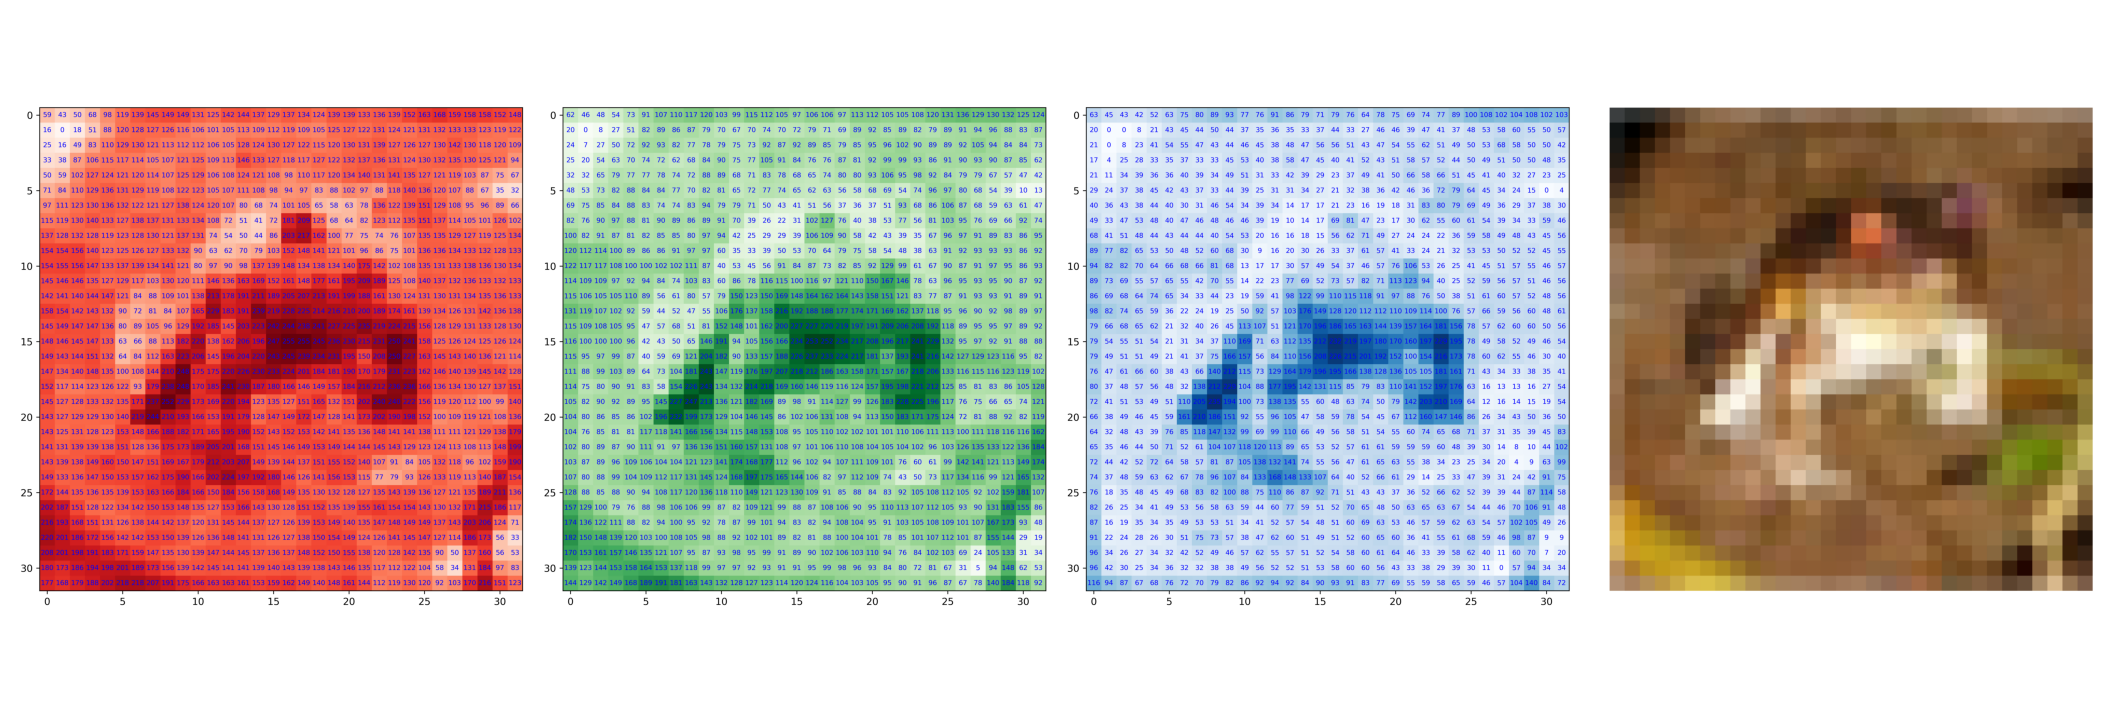

In [8]:
cifar_dataset = torchvision.datasets.CIFAR10(
    root="data/cifar",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

if not os.path.exists("assets/gif/image1"):
    os.makedirs("assets/gif/image1")

for image_tensor, label in cifar_dataset:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
    image_tensor *= 255
    image_tensor = image_tensor.int()
    plt.axis("off")
    plt.tight_layout()
    ax1.imshow(image_tensor[0], cmap="Reds")
    ax2.imshow(image_tensor[1], cmap="Greens")
    ax3.imshow(image_tensor[2], cmap="Blues")
    ax4.imshow(image_tensor.permute(1, 2, 0))
    for i in range(image_tensor[0].shape[0]):
        for j in range(image_tensor[0].shape[1]):
            ax1.text(
                i,
                j,
                str(int(image_tensor[0][j][i].item())),
                va="center",
                ha="center",
                color="blue",
                fontsize="x-small",
            )
            ax2.text(
                i,
                j,
                str(int(image_tensor[1][j][i].item())),
                va="center",
                ha="center",
                color="blue",
                fontsize="x-small",
            )
            ax3.text(
                i,
                j,
                str(int(image_tensor[2][j][i].item())),
                va="center",
                ha="center",
                color="blue",
                fontsize="x-small",
            )
    fig.savefig("assets/gif/image1/0.png", dpi=500)
    plt.close(fig)
    break

fig, ax = plt.subplots(figsize=(30, 10))
plt.axis("off")
plt.tight_layout()
ax.imshow(mpimg.imread("assets/gif/image1/0.png"))

### Document as "Bag of Words" model

Now, we move to object representation of a document, which can be seen as a sequence of letters. But the distribution of frequency of letters in every English documents would be somewhat similar and not good for representation.
Hence, we take individual words as the smallest unit.

For Bag of Words model, there are multiple steps. We will explore the different steps with the help of an example from IMDB reviews dataset.

In [33]:
import torchtext
import re

imdb_dataset = torchtext.datasets.IMDB(root="./data/imdb", split="test")

In [34]:
item = next(imdb_dataset)
label = item[0]
review_text = item[1]

In [35]:
display(review_text)

'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as they have

**Step 1: Breaking the text into sentences**

In [12]:
review_sent_tokens = re.split(
    r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", review_text
)  # Use this regex instead of simple .split("."), as review contains "..."
display(review_sent_tokens)

['I love sci-fi and am willing to put up with a lot.',
 'Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood.',
 'I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original).',
 "Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting.",
 "(I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV.",
 "It's not.",
 "It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf.",
 'Star Trek).',
 'It may treat important issues, yet not as a serious philosophy.',
 "It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life.",
 'Their actions and reactions are wooden and predictable, often painful to watch.',
 'The makers of

In [13]:
review_sent_tokens = review_sent_tokens[
    :5
]  # Take only first 3 sentences for illustration

**Step 2: Breaking the sentences into words (tokenization)**

In [14]:
def tokenise(sentence):
    # split the sentence into units (words or phrases)
    return re.findall("[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|['\w\-]+", sentence)


review_word_tokens = [tokenise(sent) for sent in review_sent_tokens]
print(*review_word_tokens, sep="\n")

['I', 'love', 'sci-fi', 'and', 'am', 'willing', 'to', 'put', 'up', 'with', 'a', 'lot']
['Sci-fi', 'movies', 'TV', 'are', 'usually', 'underfunded', 'under-appreciated', 'and', 'misunderstood']
['I', 'tried', 'to', 'like', 'this', 'I', 'really', 'did', 'but', 'it', 'is', 'to', 'good', 'TV', 'sci-fi', 'as', 'Babylon', '5', 'is', 'to', 'Star', 'Trek', 'the', 'original']
['Silly', 'prosthetics', 'cheap', 'cardboard', 'sets', 'stilted', 'dialogues', 'CG', 'that', "doesn't", 'match', 'the', 'background', 'and', 'painfully', 'one-dimensional', 'characters', 'cannot', 'be', 'overcome', 'with', 'a', "'sci-fi'", 'setting']
["I'm", 'sure', 'there', 'are', 'those', 'of', 'you', 'out', 'there', 'who', 'think', 'Babylon', '5', 'is', 'good', 'sci-fi', 'TV']


**Step 3a: Stemming**

In [15]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()


def stem_sentence(sent_word_tokens):
    return [ps.stem(word) for word in sent_word_tokens]


review_word_stem_tokens = [
    stem_sentence(sent_word_tokens) for sent_word_tokens in review_word_tokens
]
print("Stemmer::")
print(*review_word_stem_tokens, sep="\n")

Stemmer::
['I', 'love', 'sci-fi', 'and', 'am', 'will', 'to', 'put', 'up', 'with', 'a', 'lot']
['sci-fi', 'movi', 'TV', 'are', 'usual', 'underfund', 'under-appreci', 'and', 'misunderstood']
['I', 'tri', 'to', 'like', 'thi', 'I', 'realli', 'did', 'but', 'it', 'is', 'to', 'good', 'TV', 'sci-fi', 'as', 'babylon', '5', 'is', 'to', 'star', 'trek', 'the', 'origin']
['silli', 'prosthet', 'cheap', 'cardboard', 'set', 'stilt', 'dialogu', 'CG', 'that', "doesn't", 'match', 'the', 'background', 'and', 'pain', 'one-dimension', 'charact', 'cannot', 'be', 'overcom', 'with', 'a', "'sci-fi'", 'set']
["i'm", 'sure', 'there', 'are', 'those', 'of', 'you', 'out', 'there', 'who', 'think', 'babylon', '5', 'is', 'good', 'sci-fi', 'TV']


**Step 3b: Lemmatization**

In [16]:
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatize_sentence(sent_word_tokens):
    return [wordnet_lemmatizer.lemmatize(word) for word in sent_word_tokens]


review_word_lemma_tokens = [
    lemmatize_sentence(sent_word_tokens) for sent_word_tokens in review_word_tokens
]
print("Lemmatizer::")
print(*review_word_lemma_tokens, sep="\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatizer::
['I', 'love', 'sci-fi', 'and', 'am', 'willing', 'to', 'put', 'up', 'with', 'a', 'lot']
['Sci-fi', 'movie', 'TV', 'are', 'usually', 'underfunded', 'under-appreciated', 'and', 'misunderstood']
['I', 'tried', 'to', 'like', 'this', 'I', 'really', 'did', 'but', 'it', 'is', 'to', 'good', 'TV', 'sci-fi', 'a', 'Babylon', '5', 'is', 'to', 'Star', 'Trek', 'the', 'original']
['Silly', 'prosthetics', 'cheap', 'cardboard', 'set', 'stilted', 'dialogue', 'CG', 'that', "doesn't", 'match', 'the', 'background', 'and', 'painfully', 'one-dimensional', 'character', 'cannot', 'be', 'overcome', 'with', 'a', "'sci-fi'", 'setting']
["I'm", 'sure', 'there', 'are', 'those', 'of', 'you', 'out', 'there', 'who', 'think', 'Babylon', '5', 'is', 'good', 'sci-fi', 'TV']


**Step 4: Removing Stopwords**

In [17]:
from nltk.corpus import stopwords

nltk.download("stopwords")


def remove_stop_words(sent_word_tokens):
    return [word for word in sent_word_tokens if word not in stopwords.words("english")]


review_word_stem_tokens = [
    remove_stop_words(sent_word_tokens) for sent_word_tokens in review_word_stem_tokens
]
print(*review_word_stem_tokens, sep="\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['I', 'love', 'sci-fi', 'put', 'lot']
['sci-fi', 'movi', 'TV', 'usual', 'underfund', 'under-appreci', 'misunderstood']
['I', 'tri', 'like', 'thi', 'I', 'realli', 'good', 'TV', 'sci-fi', 'babylon', '5', 'star', 'trek', 'origin']
['silli', 'prosthet', 'cheap', 'cardboard', 'set', 'stilt', 'dialogu', 'CG', 'match', 'background', 'pain', 'one-dimension', 'charact', 'cannot', 'overcom', "'sci-fi'", 'set']
["i'm", 'sure', 'think', 'babylon', '5', 'good', 'sci-fi', 'TV']


**Step 5: Building Unigrams, Bigrams, Trigrams, Skip-grams etc.**

Unigrams

In [18]:
import pandas as pd
import numpy as np

unigram_vocab = {}
for sent in review_word_stem_tokens:
    for word in sent:
        if word not in unigram_vocab:
            unigram_vocab[word] = len(unigram_vocab)

review_sent_count_vectors = np.zeros(
    (len(review_word_stem_tokens), len(unigram_vocab)), dtype=np.int32
)

for sent_idx in range(len(review_word_stem_tokens)):
    for word in review_word_stem_tokens[sent_idx]:
        review_sent_count_vectors[sent_idx][unigram_vocab[word]] += 1

df = pd.DataFrame(
    data=review_sent_count_vectors, columns=sorted(unigram_vocab, key=unigram_vocab.get)
)
display(df)

,I,love,sci-fi,put,lot,movi,TV,usual,underfund,under-appreci,misunderstood,tri,like,thi,realli,good,babylon,5,star,trek,origin,silli,prosthet,cheap,cardboard,set,stilt,dialogu,CG,match,background,pain,one-dimension,charact,cannot,overcom,'sci-fi',i'm,sure,think
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


Bigrams

In [23]:
bigram_vocab = {}
for sent in review_word_stem_tokens:
    for word_idx in range(len(sent) - 1):
        bigram = sent[word_idx] + str(" ") + sent[word_idx + 1]
        if bigram not in bigram_vocab:
            bigram_vocab[bigram] = len(bigram_vocab)

review_sent_bigram_count_vectors = np.zeros(
    (len(review_word_stem_tokens), len(bigram_vocab)), dtype=np.int32
)

for sent_idx in range(len(review_word_stem_tokens)):
    for word_idx in range(len(review_word_stem_tokens[sent_idx]) - 1):
        bigram = (
            review_word_stem_tokens[sent_idx][word_idx]
            + str(" ")
            + review_word_stem_tokens[sent_idx][word_idx + 1]
        )
        review_sent_bigram_count_vectors[sent_idx][bigram_vocab[bigram]] += 1

df = pd.DataFrame(
    data=review_sent_bigram_count_vectors,
    columns=sorted(bigram_vocab, key=bigram_vocab.get),
)
display(df)

,I love,love sci-fi,sci-fi put,put lot,sci-fi movi,movi TV,TV usual,usual underfund,underfund under-appreci,under-appreci misunderstood,I tri,tri like,like thi,thi I,I realli,realli good,good TV,TV sci-fi,sci-fi babylon,babylon 5,5 star,star trek,trek origin,silli prosthet,prosthet cheap,cheap cardboard,cardboard set,set stilt,stilt dialogu,dialogu CG,CG match,match background,background pain,pain one-dimension,one-dimension charact,charact cannot,cannot overcom,overcom 'sci-fi','sci-fi' set,i'm sure,sure think,think babylon,5 good,good sci-fi,sci-fi TV
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1


Trigrams

In [25]:
trigram_vocab = {}
for sent in review_word_stem_tokens:
    for word_idx in range(len(sent) - 2):
        trigram = (
            sent[word_idx]
            + str(" ")
            + sent[word_idx + 1]
            + str(" ")
            + sent[word_idx + 2]
        )
        if trigram not in trigram_vocab:
            trigram_vocab[trigram] = len(trigram_vocab)

review_sent_trigram_count_vectors = np.zeros(
    (len(review_word_stem_tokens), len(trigram_vocab)), dtype=np.int32
)

for sent_idx in range(len(review_word_stem_tokens)):
    for word_idx in range(len(review_word_stem_tokens[sent_idx]) - 2):
        trigram = (
            review_word_stem_tokens[sent_idx][word_idx]
            + str(" ")
            + review_word_stem_tokens[sent_idx][word_idx + 1]
            + str(" ")
            + review_word_stem_tokens[sent_idx][word_idx + 2]
        )
        review_sent_trigram_count_vectors[sent_idx][trigram_vocab[trigram]] += 1

df = pd.DataFrame(
    data=review_sent_trigram_count_vectors,
    columns=sorted(trigram_vocab, key=trigram_vocab.get),
)
display(df)

,I love sci-fi,love sci-fi put,sci-fi put lot,sci-fi movi TV,movi TV usual,TV usual underfund,usual underfund under-appreci,underfund under-appreci misunderstood,I tri like,tri like thi,like thi I,thi I realli,I realli good,realli good TV,good TV sci-fi,TV sci-fi babylon,sci-fi babylon 5,babylon 5 star,5 star trek,star trek origin,silli prosthet cheap,prosthet cheap cardboard,cheap cardboard set,cardboard set stilt,set stilt dialogu,stilt dialogu CG,dialogu CG match,CG match background,match background pain,background pain one-dimension,pain one-dimension charact,one-dimension charact cannot,charact cannot overcom,cannot overcom 'sci-fi',overcom 'sci-fi' set,i'm sure think,sure think babylon,think babylon 5,babylon 5 good,5 good sci-fi,good sci-fi TV
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1


Skip-1-gram

In [28]:
skip_1_gram_vocab = {}
for sent in review_word_stem_tokens:
    for word_idx in range(len(sent) - 2):
        skipgram = sent[word_idx] + str(" ") + sent[word_idx + 2]
        if skipgram not in skip_1_gram_vocab:
            skip_1_gram_vocab[skipgram] = len(skip_1_gram_vocab)

review_sent_skipgram_count_vectors = np.zeros(
    (len(review_word_stem_tokens), len(skip_1_gram_vocab)), dtype=np.int32
)

for sent_idx in range(len(review_word_stem_tokens)):
    for word_idx in range(len(review_word_stem_tokens[sent_idx]) - 2):
        skipgram = (
            review_word_stem_tokens[sent_idx][word_idx]
            + str(" ")
            + review_word_stem_tokens[sent_idx][word_idx + 2]
        )
        review_sent_skipgram_count_vectors[sent_idx][skip_1_gram_vocab[skipgram]] += 1

df = pd.DataFrame(
    data=review_sent_skipgram_count_vectors,
    columns=sorted(skip_1_gram_vocab, key=skip_1_gram_vocab.get),
)
display(df)

,I sci-fi,love put,sci-fi lot,sci-fi TV,movi usual,TV underfund,usual under-appreci,underfund misunderstood,I like,tri thi,like I,thi realli,I good,realli TV,good sci-fi,TV babylon,sci-fi 5,babylon star,5 trek,star origin,silli cheap,prosthet cardboard,cheap set,cardboard stilt,set dialogu,stilt CG,dialogu match,CG background,match pain,background one-dimension,pain charact,one-dimension cannot,charact overcom,cannot 'sci-fi',overcom set,i'm think,sure babylon,think 5,babylon good,5 sci-fi,good TV
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1


<footer>
Author(s): Sachin Yadav
</footer>